In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv('/content/placement (1).csv')

In [ ]:
df.isna().sum()

cgpa                    0
placement_exam_marks    0
placed                  0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cgpa                  1000 non-null   float64
 1   placement_exam_marks  1000 non-null   float64
 2   placed                1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

In [ ]:
df['placement_exam_marks'].skew()

0.8356419499466834

<Axes: >

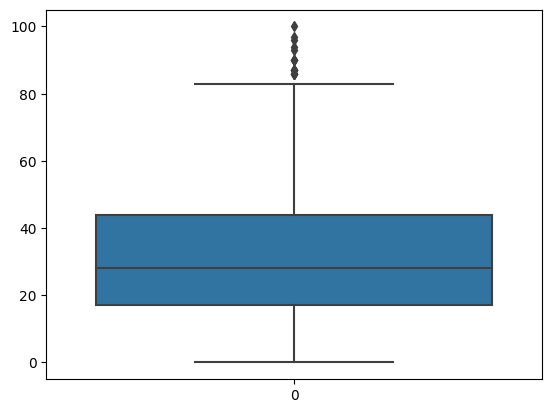

In [ ]:
sns.boxplot(df['placement_exam_marks'])

<ipython-input-9-1681233d8c23>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'])
<ipython-input-9-1681233d8c23>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])


<Axes: xlabel='placement_exam_marks', ylabel='Density'>

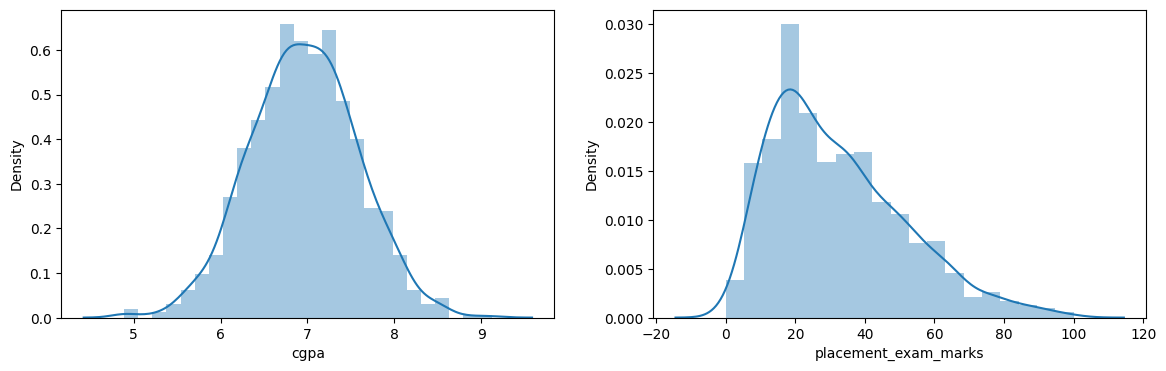

In [ ]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sns.distplot(df['cgpa'])

plt.subplot(1,2,2)
sns.distplot(df['placement_exam_marks'])

## *For Inter quantile based filtering we need to cal Q1 ,Q3, IQR then we will see data beside Q1-1.5*IQR and Q3+1.5*IQR these will be our lower and upper limits and will see data in this range itself* ##

In [ ]:
Q1=df['placement_exam_marks'].quantile(0.25)
Q3=df['placement_exam_marks'].quantile(0.75)


In [ ]:
IQR=Q3-Q1

In [ ]:
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR

In [ ]:
print(f"LOWER_LIMIT: {lower_limit}")
print(f"UPPER_LIMIT: {upper_limit}")


LOWER_LIMIT: -23.5
UPPER_LIMIT: 84.5


# Outliers

In [ ]:
df[df['placement_exam_marks']<lower_limit]

,cgpa,placement_exam_marks,placed


In [ ]:
df[df['placement_exam_marks']>upper_limit]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


#Triming

In [ ]:
new_df= df[df['placement_exam_marks']< upper_limit ]

In [ ]:
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


<ipython-input-26-42fb8e244677>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])
<ipython-input-26-42fb8e244677>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['placement_exam_marks'])


<Axes: >

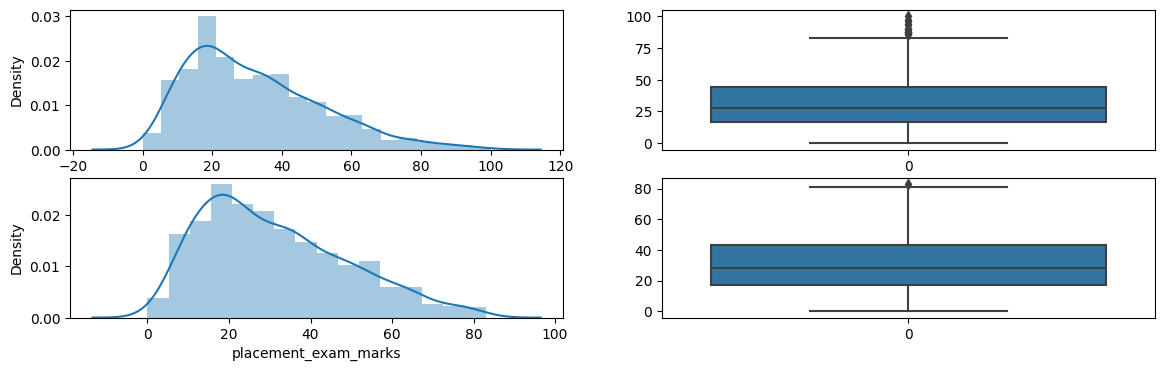

In [ ]:
plt.figure(figsize=(14,4))
plt.subplot(2,2,1)
sns.distplot(df['placement_exam_marks'])

plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.distplot(new_df['placement_exam_marks'])

plt.subplot(2,2,4)
sns.boxplot(new_df['placement_exam_marks'])

# Caping

In [ ]:

new_df_=df.copy()

new_df_['placement_exam_marks']=np.where(df['placement_exam_marks']>upper_limit,
upper_limit,np.where(df['placement_exam_marks']<lower_limit,
                     lower_limit,
                     df['placement_exam_marks']
                     )
)

new_df_

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


<ipython-input-32-da771b750ad5>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])
<ipython-input-32-da771b750ad5>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df_['placement_exam_marks'])


<Axes: >

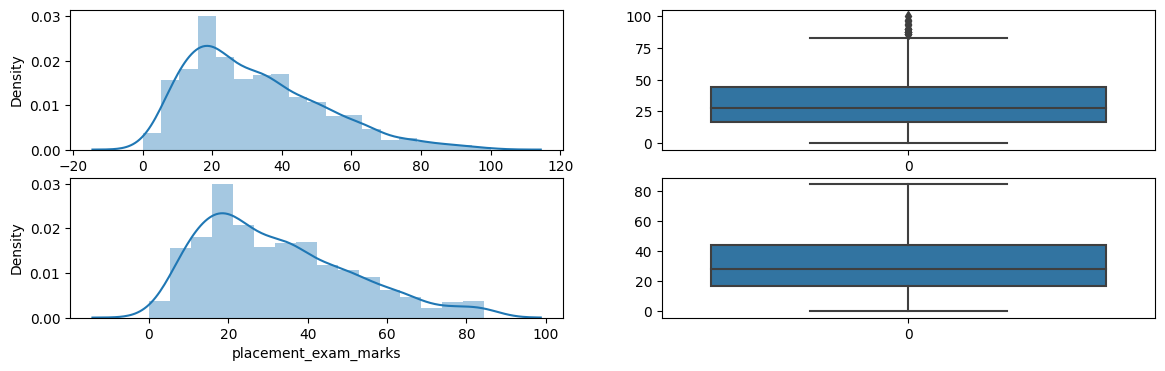

In [ ]:
plt.figure(figsize=(14,4))
plt.subplot(2,2,1)
sns.distplot(df['placement_exam_marks'])

plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.distplot(new_df_['placement_exam_marks'])

plt.subplot(2,2,4)
sns.boxplot(new_df_['placement_exam_marks'])